In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('headbrain.csv')

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


#### Rename The Column Name

In [5]:
df.rename(columns={'Head Size(cm^3)':'head_size', 'Brain Weight(grams)':'brain_weight'}, inplace=True)

In [6]:
df.head()

,Gender,Age Range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


#### Get the data types

In [7]:
df.dtypes

Gender          int64
Age Range       int64
head_size       int64
brain_weight    int64
dtype: object

#### Get The Number of Unique Values Present in Each Column

In [8]:
df.nunique()

Gender            2
Age Range         2
head_size       221
brain_weight    146
dtype: int64

#### Null Values

In [9]:
df.isnull().sum()

Gender          0
Age Range       0
head_size       0
brain_weight    0
dtype: int64

#### Duplicates

In [10]:
df.duplicated().sum()

0

#### Let's get some insight from brain_weight & head_size

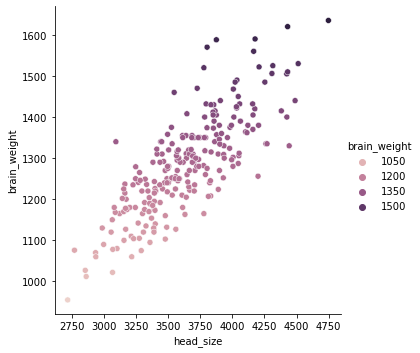

In [11]:
sns.relplot(x='head_size', y='brain_weight', hue='brain_weight', data=df)

##### " We can say there exists a linear relationship, the brain size increases brain weight also increase "

### Train & Test The Data

In [12]:
X = df['head_size'].values
Y = df['brain_weight'].values

In [13]:
X.shape

(237,)

In [14]:
Y.shape

(237,)

#### Method 1: Manual coding

In [15]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

num = 0
den = 0

for i in range(n):
    num += ((X[i]-mean_X)* (Y[i]-mean_Y))
    den +=(X[i]-mean_X)**2
m = num/den
c = mean_Y - (m*mean_X)

print(m,',',c)

0.26342933948939945 , 325.57342104944223


In [16]:
min_x = np.min(X)-100
max_x = np.max(X)+100

In [17]:
x = np.linspace(min_x,max_x,1000)
y = m*x+c

Text(0, 0.5, 'Brain weight in grams')

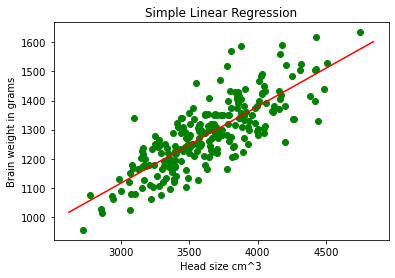

In [18]:
plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

#### Calculating the error

In [20]:
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

0.6393117199570003


R^2 > 0.5. So we have good model

In [21]:
def predict(x):
    y = m*x + c
    print(y)

In [22]:
predict(4112)

1408.7948650298529


here we predict the brain wieght for given head size(cm^3)

#### Method 2: LinearRegression using scikit-learn

In [23]:
X_N  = df.drop('brain_weight', axis=1)
Y_N = df['brain_weight']

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X_N, Y_N, test_size=0.3, random_state=2)

In [25]:
print(X_N.shape,X_train.shape,X_test.shape)

(237, 3) (165, 3) (72, 3)


In [26]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
model.score(X_train,Y_train)*100

65.08821354248286

In [28]:
model.score(X_test,Y_test)*100

63.79206247852196

In [29]:
prediction = model.predict(X_test)
cross_check = pd.DataFrame({'Actual' : Y_test , 'Predicted' : prediction})
cross_check.head(10)

,Actual,Predicted
20,1357,1362.835016
149,1168,1146.943959
30,1318,1339.307271
54,1400,1397.480267
147,1243,1192.706716
24,1635,1587.512054
211,1320,1248.475698
216,1180,1162.121117
10,1340,1250.367224
202,1105,1170.136063


In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(Y_test, prediction)

0.6379206247852196